In [4]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [5]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

In [6]:
import pandas as pd

In [7]:
query="""
    select * 
    from agg.t_msb1m
"""

In [8]:
df = pd.read_sql_query(query, conn)

/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_37252/1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [9]:
df

,site,year,month,day,hour,min,tz,soc,discharge_wh,charge_wh,...,gridexport_wh,gridimport_wh,pvcharge_wh,pvcons_wh,pvexport_wh,griddischarge_wh,gridcharge_wh,gridcons_wh,consdischarge_wh,mismatch_wh
0,42,2019,6,26,19,15,UTC+01:00,100.0,0.00,0.75,...,39.26,0.00,0.75,41.31,39.26,0.00,0.00,0.00,0.00,0.0
1,42,2019,6,26,19,30,UTC+01:00,100.0,0.07,0.70,...,23.89,0.00,0.70,29.92,23.82,0.07,0.00,0.00,0.00,0.0
2,42,2019,6,26,19,45,UTC+01:00,100.0,13.66,0.20,...,1.79,6.61,0.15,41.10,1.79,0.00,0.05,6.56,13.66,0.0
3,42,2019,6,26,20,0,UTC+01:00,100.0,8.47,0.20,...,0.46,5.27,0.15,31.85,0.24,0.22,0.05,5.22,8.25,0.0
4,42,2019,6,26,20,15,UTC+01:00,100.0,4.13,0.40,...,5.22,0.73,0.35,20.43,4.00,1.22,0.05,0.68,2.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599357,42,2019,6,26,18,0,UTC+01:00,97.0,33.43,132.82,...,112.35,0.00,132.82,53.03,110.94,1.41,0.00,0.00,32.02,0.0
1599358,42,2019,6,26,18,15,UTC+01:00,97.0,0.00,143.38,...,73.16,0.00,143.38,29.26,73.16,0.00,0.00,0.00,0.00,0.0
1599359,42,2019,6,26,18,30,UTC+01:00,97.0,0.00,53.86,...,6.12,0.14,53.72,62.09,6.12,0.00,0.14,0.00,0.00,0.0
1599360,42,2019,6,26,18,45,UTC+01:00,97.0,0.00,12.84,...,6.14,0.00,12.84,36.87,6.14,0.00,0.00,0.00,0.00,0.0


In [10]:
df['net load'] = df['consumption_wh']+df['charge_wh']-df['discharge_wh']-df['production_wh']

In [11]:
df.columns

Index(['site', 'year', 'month', 'day', 'hour', 'min', 'tz', 'soc',
       'discharge_wh', 'charge_wh', 'production_wh', 'consumption_wh',
       'gridexport_wh', 'gridimport_wh', 'pvcharge_wh', 'pvcons_wh',
       'pvexport_wh', 'griddischarge_wh', 'gridcharge_wh', 'gridcons_wh',
       'consdischarge_wh', 'mismatch_wh', 'net load'],
      dtype='object')

In [12]:
df.isnull().sum()

site                0
year                0
month               0
day                 0
hour                0
min                 0
tz                  0
soc                 0
discharge_wh        0
charge_wh           0
production_wh       0
consumption_wh      0
gridexport_wh       0
gridimport_wh       0
pvcharge_wh         0
pvcons_wh           0
pvexport_wh         0
griddischarge_wh    0
gridcharge_wh       0
gridcons_wh         0
consdischarge_wh    0
mismatch_wh         0
net load            0
dtype: int64

In [13]:
print(df["year"].unique())
print(df["month"].unique())

[2019 2020]
[ 6  7  8  9 10 11 12  1  2  3  4  5]


/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_37252/2655505062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_2_data['datetime'] = pd.to_datetime(site_2_data[['year', 'month', 'day', 'hour']])


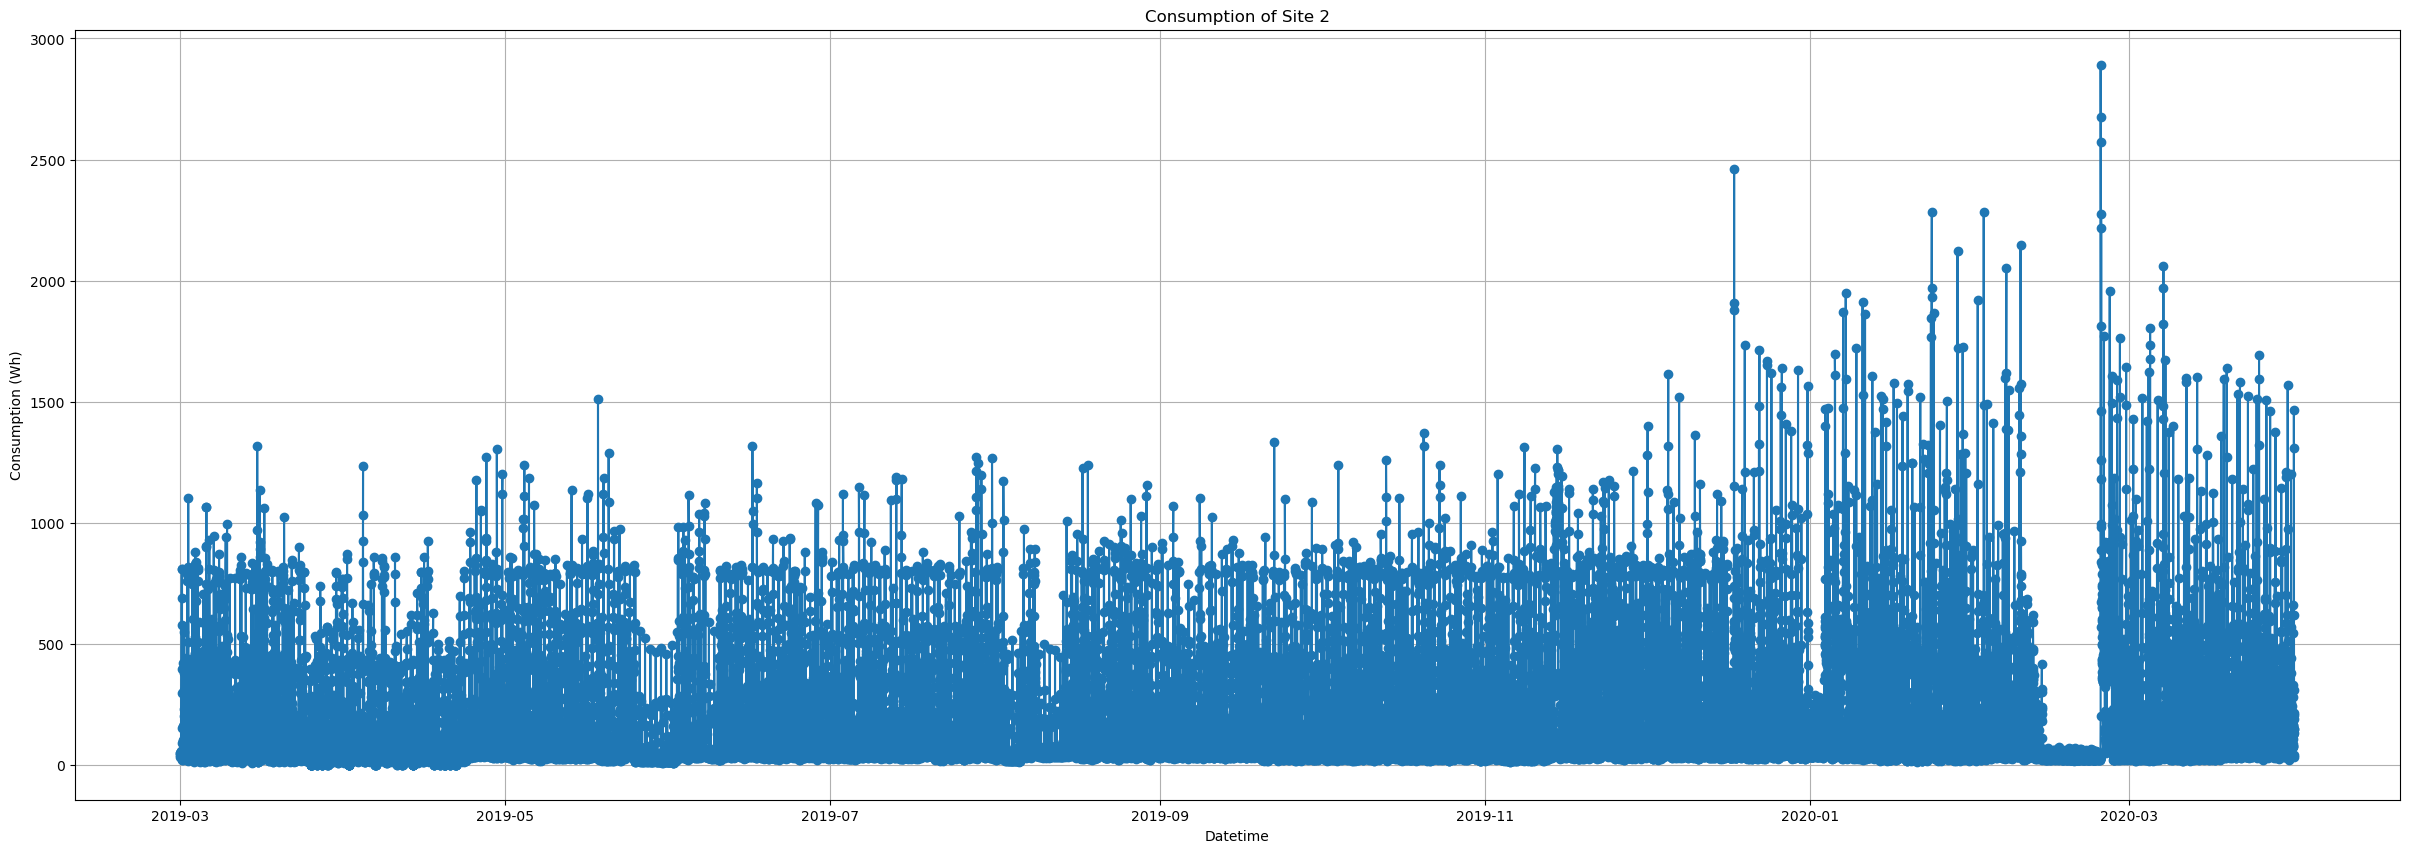

In [14]:
import matplotlib.pyplot as plt


site_2_data = df[df['site'] == 2]
site_2_data['datetime'] = pd.to_datetime(site_2_data[['year', 'month', 'day', 'hour']])

plt.figure(figsize=(30, 10))
plt.plot(site_2_data['datetime'], site_2_data['consumption_wh'], marker='o')  # Removed linestyle='-'
plt.title('Consumption of Site 2')
plt.xlabel('Datetime')
plt.ylabel('Consumption (Wh)')
plt.grid(True)
plt.show()

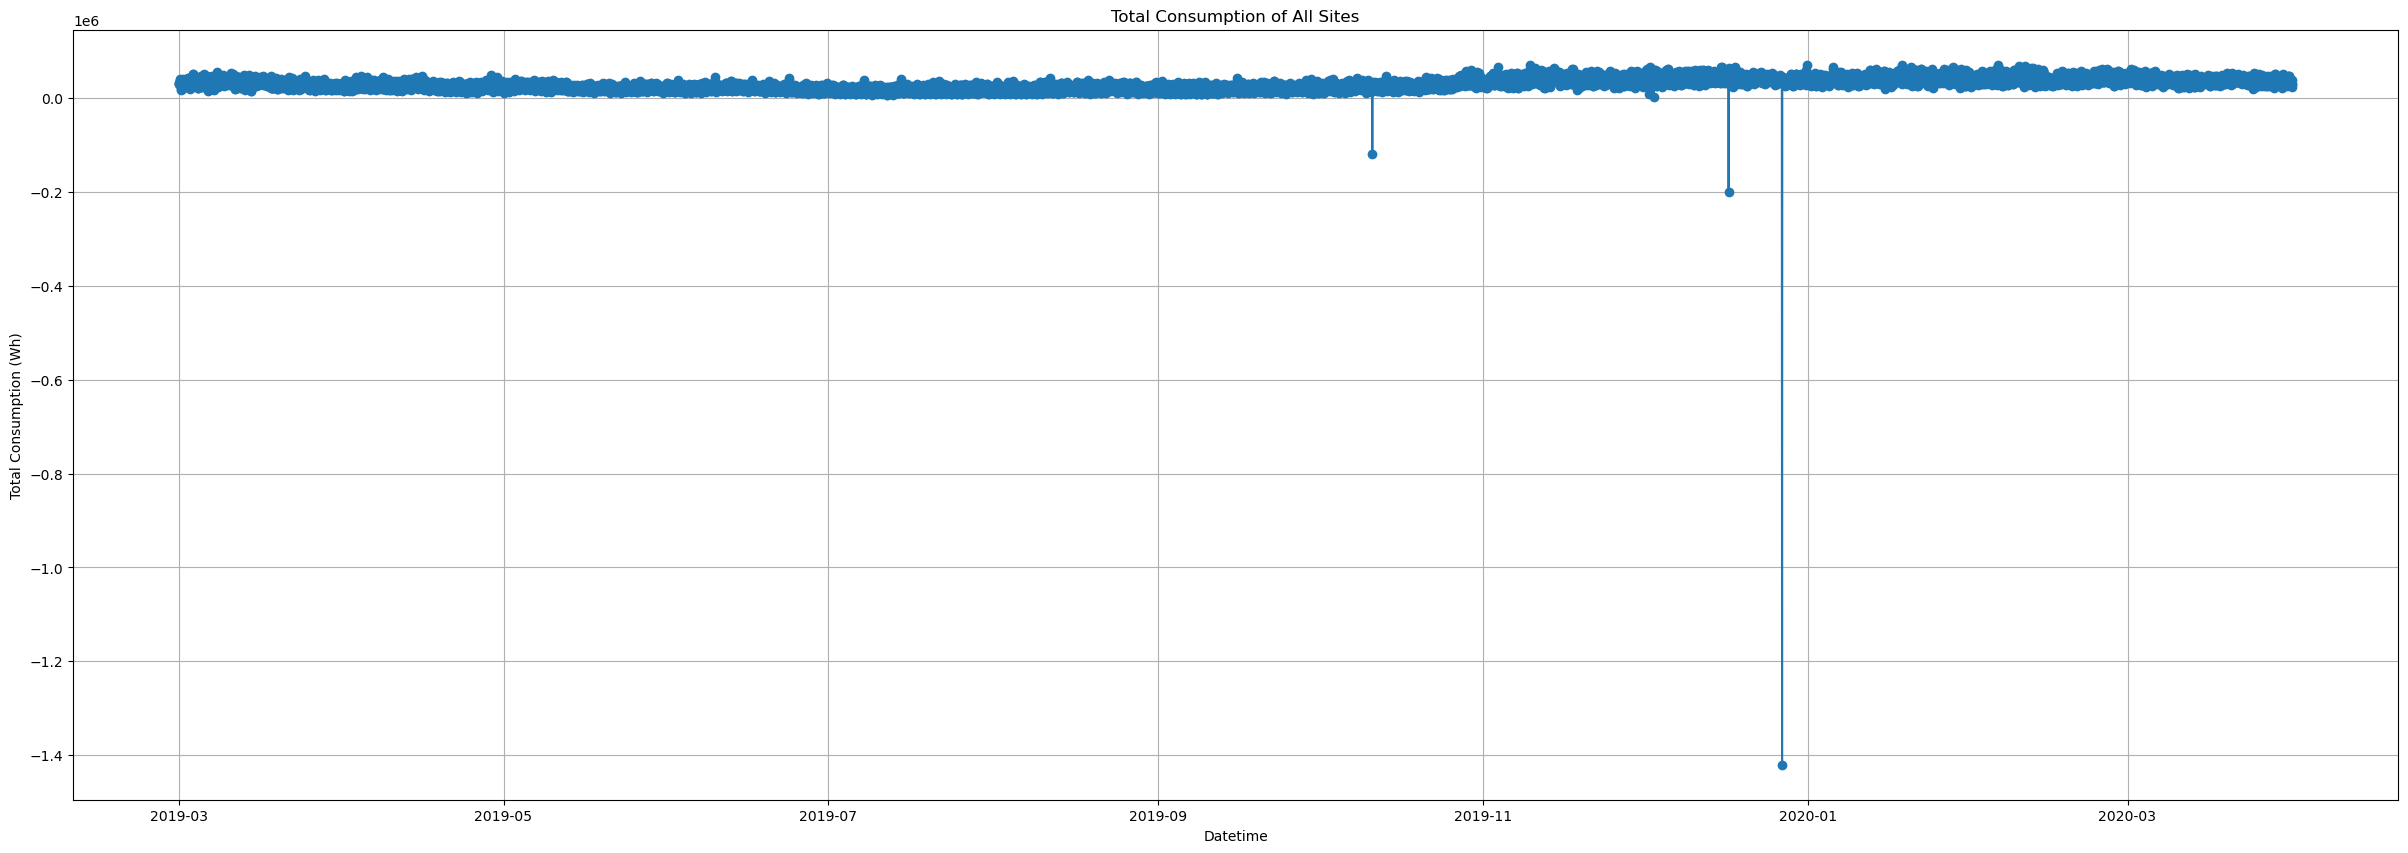

In [15]:
#TOTAL CONSUMPTION
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Group by datetime and sum the consumption for all sites
total_consumption = df.groupby('datetime')['consumption_wh'].sum()

# Plot total consumption
plt.figure(figsize=(30, 10))
plt.plot(total_consumption.index, total_consumption.values, marker='o')
plt.title('Total Consumption of All Sites')
plt.xlabel('Datetime')
plt.ylabel('Total Consumption (Wh)')
plt.grid(True)
plt.show()

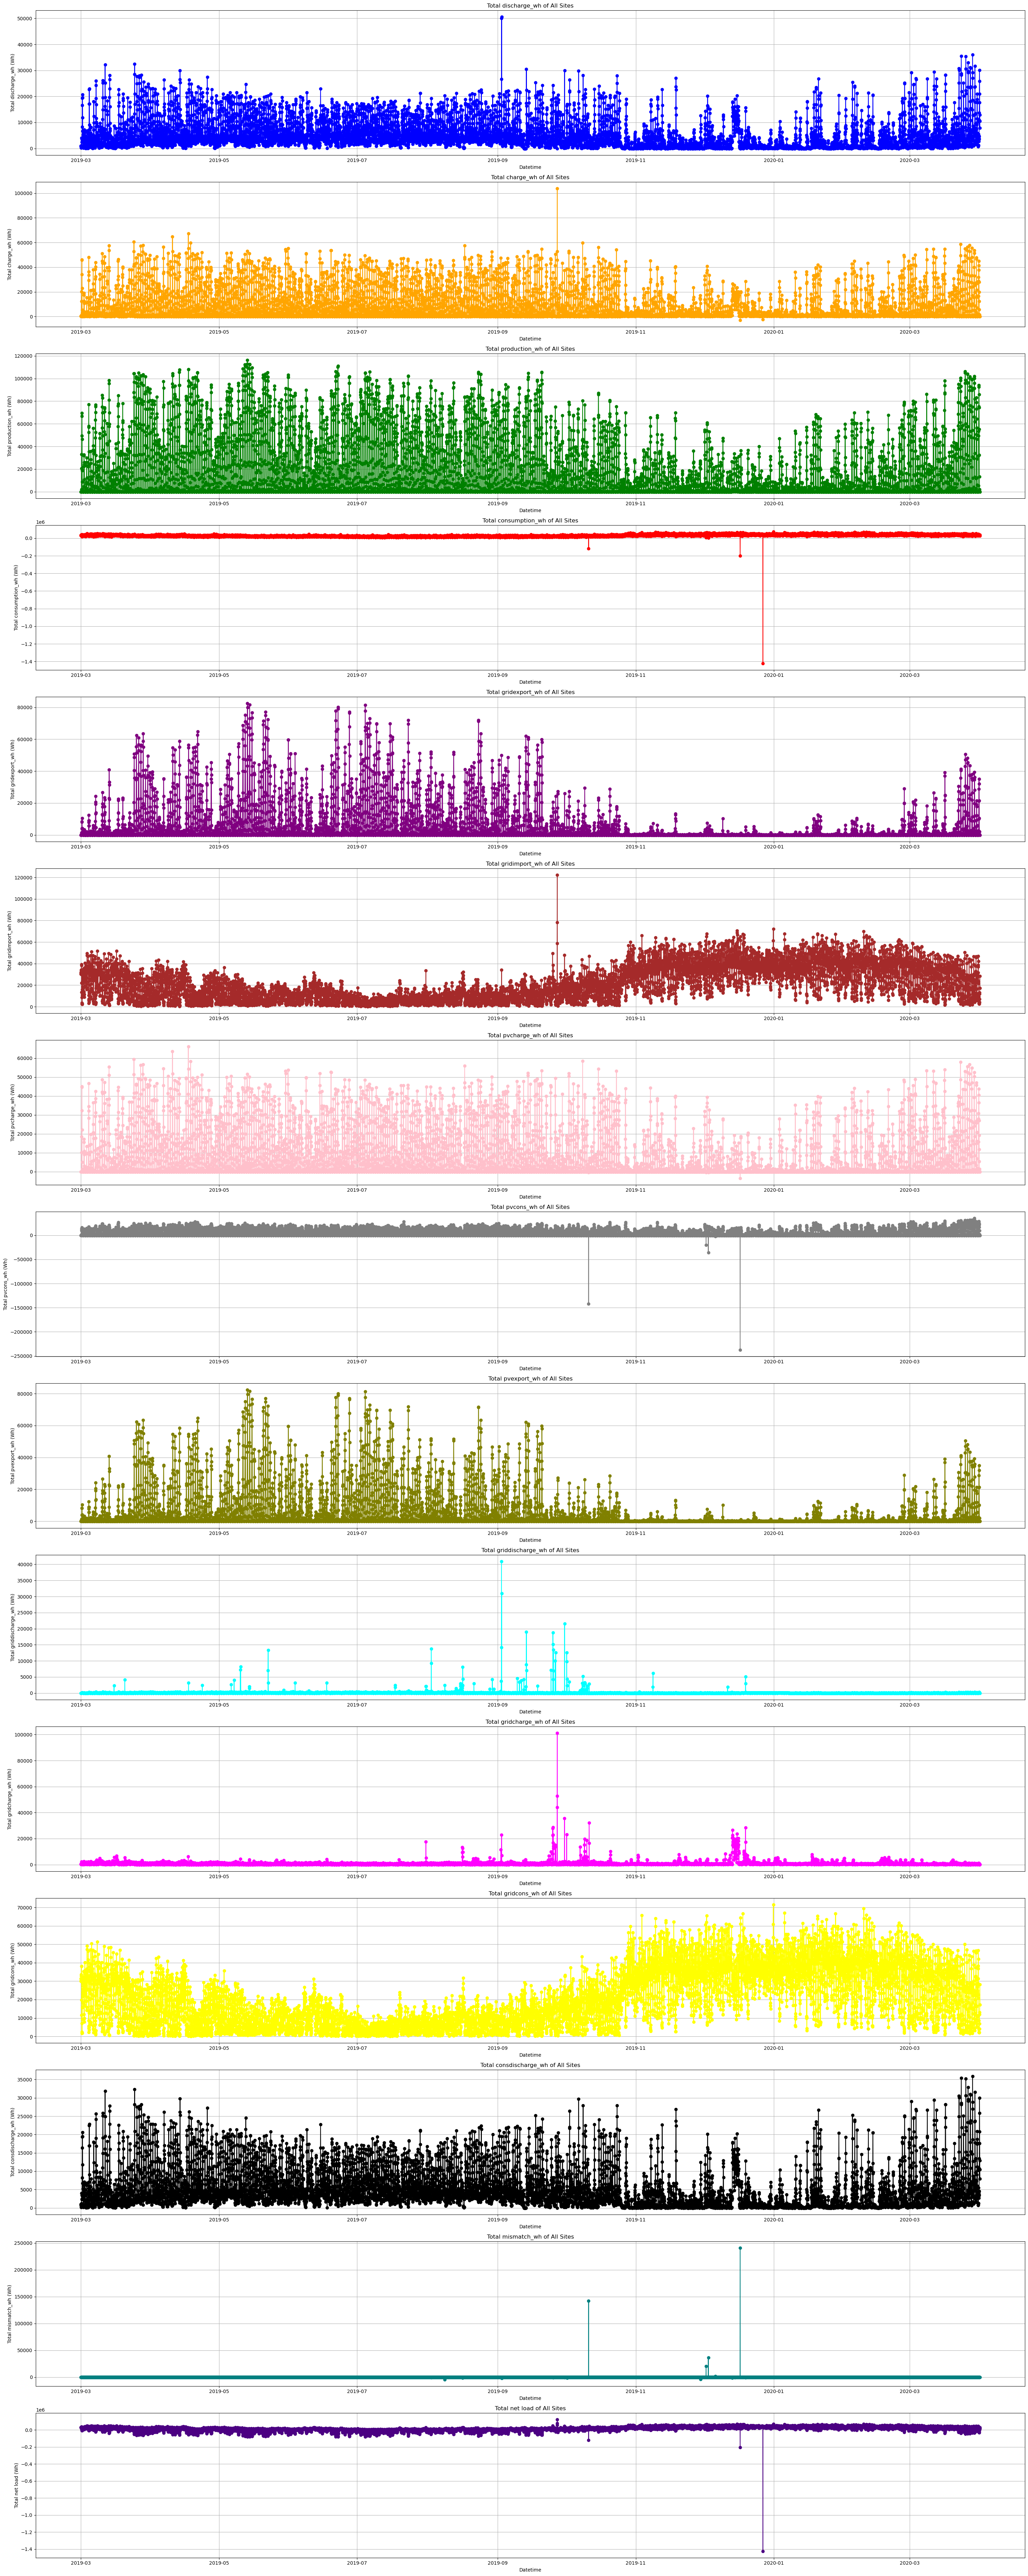

In [16]:
columns_of_interest = ['discharge_wh', 'charge_wh', 'production_wh', 'consumption_wh',
                       'gridexport_wh', 'gridimport_wh', 'pvcharge_wh', 'pvcons_wh',
                       'pvexport_wh', 'griddischarge_wh', 'gridcharge_wh', 'gridcons_wh',
                       'consdischarge_wh', 'mismatch_wh','net load']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal','indigo']

fig, axs = plt.subplots(len(columns_of_interest), 1, figsize=(30, len(columns_of_interest) * 5))

for i, (column, color) in enumerate(zip(columns_of_interest, colors)):
    total_column = df.groupby('datetime')[column].sum()
    
    axs[i].plot(total_column.index, total_column.values, marker='o', color=color)
    axs[i].set_title(f'Total {column} of All Sites')
    axs[i].set_xlabel('Datetime')
    axs[i].set_ylabel(f'Total {column} (Wh)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [22]:
#Detection of Outliers
sum_by_datetime = df.groupby('datetime')[['discharge_wh','charge_wh','consumption_wh','gridimport_wh','pvcons_wh','griddischarge_wh',
'gridcharge_wh','mismatch_wh','net load']].sum()

outliers_discharge = sum_by_datetime[sum_by_datetime['discharge_wh'] > 40000].index
outliers_charge = sum_by_datetime[sum_by_datetime['charge_wh'] > 80000].index
outliers_consumption = sum_by_datetime[sum_by_datetime['consumption_wh'] < 0].index
outliers_gridimports = sum_by_datetime[sum_by_datetime['gridimport_wh'] > 80000].index
outliers_pvcons = sum_by_datetime[sum_by_datetime['pvcons_wh'] < 0].index
outliers_griddischarge = sum_by_datetime[sum_by_datetime['griddischarge_wh'] > 25000].index
outliers_gridcharge = sum_by_datetime[sum_by_datetime['gridcharge_wh'] > 40000].index
outliers_mismatch = sum_by_datetime[sum_by_datetime['mismatch_wh'] > 50000].index
outliers_netload = sum_by_datetime[sum_by_datetime['net load'] < -0.2].index

# Combine the outlier dates from both conditions
outliers_dates = set(outliers_discharge).union(outliers_charge, outliers_consumption, outliers_gridimports, 
                                               outliers_pvcons, outliers_griddischarge, outliers_gridcharge,
                                               outliers_mismatch, outliers_netload)

outliers_count = len(outliers_dates)
print(outliers_count)

# Print the dates of outliers
for date in outliers_dates:
    print(date)

1564
2019-05-30 13:00:00
2019-03-28 13:00:00
2019-05-08 09:00:00
2019-06-06 10:00:00
2019-08-07 17:00:00
2019-09-01 14:00:00
2020-03-27 13:00:00
2019-05-25 11:00:00
2019-03-24 11:00:00
2020-03-27 09:00:00
2019-07-03 11:00:00
2019-04-09 16:00:00
2020-03-25 11:00:00
2019-06-02 13:00:00
2019-04-08 13:00:00
2019-09-04 15:00:00
2019-09-15 12:00:00
2019-08-21 12:00:00
2019-07-17 16:00:00
2019-03-24 14:00:00
2019-08-21 16:00:00
2020-03-16 15:00:00
2019-07-24 16:00:00
2019-07-10 12:00:00
2019-07-26 09:00:00
2019-05-21 17:00:00
2019-04-08 10:00:00
2019-05-10 14:00:00
2019-08-04 10:00:00
2019-11-18 14:00:00
2019-06-27 13:00:00
2019-07-28 09:00:00
2019-04-16 12:00:00
2020-03-27 12:00:00
2019-05-07 15:00:00
2019-05-01 15:00:00
2019-10-16 13:00:00
2019-05-24 17:00:00
2019-10-16 15:00:00
2019-08-23 13:00:00
2019-04-10 11:00:00
2019-08-13 14:00:00
2019-07-21 14:00:00
2019-06-30 12:00:00
2019-04-27 15:00:00
2019-06-22 10:00:00
2019-05-18 19:00:00
2019-05-31 12:00:00
2019-07-09 18:00:00
2019-07-18 12:0